In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [85]:
import DataStore
from matplotlib import pyplot as plt

ds = DataStore.DataStore("data", 1)

In [66]:
ds.trainData['A-3'].x[2056]

array([[0.11308108, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [67]:
ds.trainData['A-3'].y[2056]

array([0.3336605, 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       ])

In [69]:
loaded_model = tf.keras.models.load_model('models/experimental/A-3.h5')

In [70]:
loaded_model.layers

In [71]:
ds.testData['A-3'].x[0]

array([[0.40241647, 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ]])

In [72]:
ds.testData['A-3'].y[0]

array([0.20466603, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [73]:
preds = loaded_model.predict(ds.testData['A-3'].x)

257/257 [==============================] - 1s 2ms/step


In [74]:
preds.shape

(8204, 1, 25)

In [78]:
y = ds.testData['A-3'].y.reshape(8204,1,25)
y.shape

(8204, 1, 25)

In [79]:
from Utils import get_e, rmse, mae, classify_pl, make_discrete_lbls, vectorize_labels
import os



In [80]:
lbls = make_discrete_lbls(os.path.join("data", "labeled_anomalies.csv"))
lbls['A-3']

[(4575, 4760)]

In [137]:
pls = classify_pl(preds, y, 25)

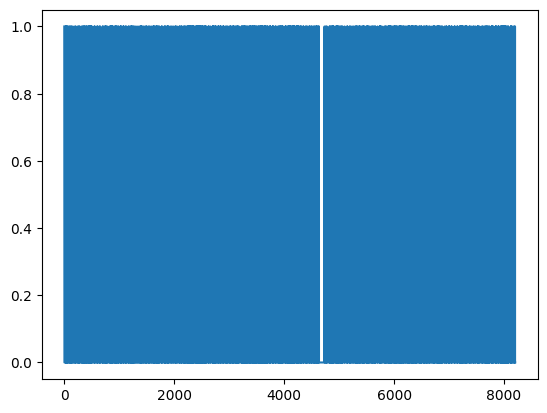

In [138]:
plt.plot(pls)

In [139]:
e = []
for i,j in zip(y, preds):
    e.append(rmse(i,j))
e = np.array(e)

In [140]:
lb = vectorize_labels(lbls['A-3'], preds.shape[0])

In [141]:
import matplotlib.pyplot as plt


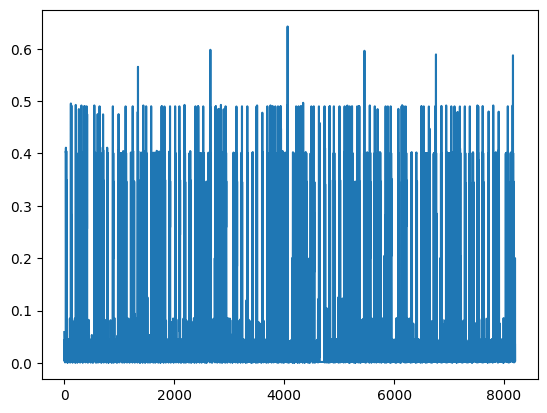

In [142]:
plt.plot(e)

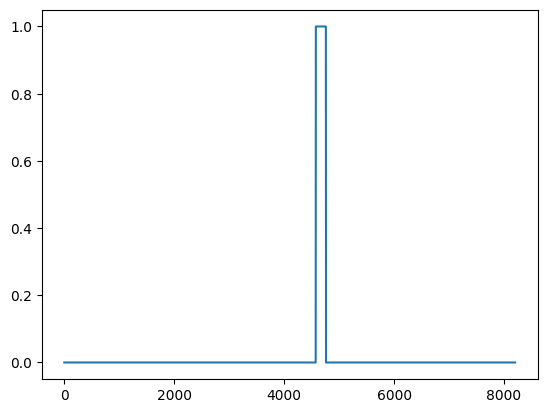

In [143]:
plt.plot(lb)

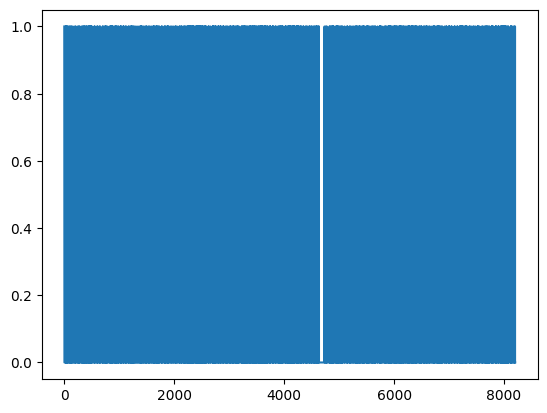

In [144]:
plt.plot(pls)

In [145]:
from sklearn.metrics import classification_report

In [146]:
print(classification_report(lb, pls, target_names=["false", "true"]))

              precision    recall  f1-score   support

       false       0.98      0.92      0.95      8019
        true       0.01      0.05      0.02       185

    accuracy                           0.90      8204
   macro avg       0.50      0.48      0.48      8204
weighted avg       0.96      0.90      0.93      8204



In [104]:
y_true = [1, 1, 1, 1, 1]
y_pred = [1, 1, 0, 1, 1]

In [105]:
target_names = ['false', 'true']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       false       0.00      0.00      0.00         0
        true       1.00      0.80      0.89         5

    accuracy                           0.80         5
   macro avg       0.50      0.40      0.44         5
weighted avg       1.00      0.80      0.89         5



/Users/juanrodriguez/PycharmProjects/pythonProject1/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juanrodriguez/PycharmProjects/pythonProject1/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juanrodriguez/PycharmProjects/pythonProject1/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_